### 모델 복잡도와 모델 정확도
- 과대적합 :모델이 너무 복잡하여 학습데이터에 지나치게 최적화되고 일반화하기 어려움
- 과소적합 : 모델이 너무 단순하여 학습데이터를 충분히 분석하지 못함
- 과대적합과 과소적합의 절충점을 바탕으로 모델의 일반화 성능을 최대화 시킬 수 있는 모델 생성


---
### 지도학습 
- 결과 값에 대한 라벨이 존재, 입력 데이터를 통해 출력 데이터가 어떤 라벨인지 분류하는 예측 수행

- 분류 기준
    - 이진 분류 : 결과 값에 대한 라벨이 두 가지 종류(Y/N, Female/Male, Success/Fail 등)    
    - 다범주 분류 : n개의 범주로 이루어진 결과 값을 분류

---
### 의사결정나무(Decision Tree)
- 의사결정 규칙을 도표화하여 관심 집단을 몇 개의 소집단으로 분류 / 예측하는 계량적 분석방법
- 의사결정나무 모델 학습 방법 
 - 엔트로피 또는 지니계수를 통해 최적의 특징값을 선정하여 최상위 노드부터 분류 기준으로 적용
 - 반복적으로 노드를 생성하여 분류
 - 더 이상 노드를 생성할 수 없거나 지정한 높이(depth)에 도달하면 분류 종료<br>
     - node : 분류 기준이 되는 특정 변수와 값
     - root node : 첫번째 분류 기준이 되는 최상위 노드
     - leaf node : 최상위 노드와 마지막 최종 노드 사이에 존재하는 중간 노드
     - leaf : 마지막 최종 노드
     - edge : 노드의 분류 결과(T/F)와 다음 노드를 연결
     - depth : 최종 노드가 생성될 때 까지의 단계
     
     
- 숫자형 결과를 반환하는 회귀 트리(Regression Tree)와 범주형 결과를 반환하는 분류 트리(Classification Tree)
- 직관적인 작동 방식으로 해석력이 아주 좋은 분류 모델로 평가
- 여러 개의 변수들에 대해 각각의 중요도를 평가 할 수 있음
- 입력 데이터에 대해 범주형 데이터와 숫자형 데이터 모두 적용할 수 있으나 범주형 데이터의 경우 라벨인코딩 적용
    - sklearn.preprocessing > labelEnconder
- 결과 값에 대해 이진 분류와 다범주 분류 모두 가능


- 과적합(Over-fitting) 관리 필요
    - 학습한 데이터와 다른 새로운 데이터에 대해 일반화하는 성능이 떨어져 과적합 경향이 큰 것이 의사결정나무의 최대 취약점
    - depth가 지나치게 크면 과적합 경향이 높음
        - clf.set_param(max_depth=n)
    - 새로운 node가 생성될 때 사용되는 sample의 개수가 지나치게 작으면 과적합 경향이 높음 
        - min_samples_split, min_samples_leaf
    - 차원(사용되는 변수)이 너무 많으면 과적합 경향이 높음 
        - max_features, PCA
    
    
- 정보획득(Information Gain), 불순도(Criterion) :  Gini Index(기본값), Entropy Index
    - 확률변수가 담고 있는 정보(범주)가 얼마나 섞여 있는가를 나타내는 지표
    - 분류 후의 순도 증가/불순도 또는 불확실성 감소가 가장 큰 변수를 우선적으로 분류 기준으로 적용
    - 최종적으로 0이 되면 균일한 정보(범주)로 이루어진 데이터     

In [4]:
# graphviz 라이브러리
# conda install graphviz
# conda install python-graphviz
# graphviz 환경변수 설정
import os

os.environ['PATH'] += os.pathsep + r'E:\anaconda\Library\bin\graphviz'

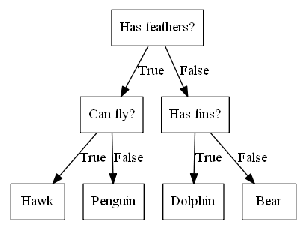

In [6]:
# 의사결정나무 예시
# prompt : pip install mglearn

import mglearn

mglearn.plots.plot_animal_tree()

In [7]:
# IRIS 데이터 적재
from sklearn import datasets

iris = datasets.load_iris()

In [8]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [9]:
# 독립변수(x, 문제), 종속변수(y, 정답)을 각각 저장해주세요
iris_x = iris.data
iris_y = iris.target

In [10]:
iris_x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [11]:
iris_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
# 학습, 평가 데이터 분리 / 8 : 2 
# 학습 : 생성한 모델을 학습시키기 위한 데이터
# 평가 : 학습시간 모델의 성능을 평가하기 위한 데이터
# 평가 데이터는 최초 1회만 사용한다.
# 일반적인 비율 : 학습 > 평가 , 8:2, 7.5:2.5, 7:3
    # train_test_split(x, y, test_size) : 반환 값은 4개, 순서를 잘 기억해서 써야함
# 여러 개의 변수 값에 변수명 입력 => 학습x, 평가x, 학습y, 평가y
from sklearn.model_selection import train_test_split

In [13]:
# 학습용 문제, 평가용 문제, 학습용 정답, 평가용 정답 쪼개기
train_x, test_x, train_y, test_y = train_test_split(iris_x, iris_y, test_size=0.2)

In [14]:
iris_x.shape

(150, 4)

In [15]:
iris_y.shape

(150,)

In [16]:
train_x.shape

(120, 4)

In [17]:
train_y.shape

(120,)

In [18]:
test_x.shape

(30, 4)

In [19]:
test_y.shape

(30,)

In [21]:
# 파이썬 머신러닝 패키지
from sklearn.tree import DecisionTreeClassifier

In [22]:
# 의사결정나무 모델 객체 생성
# 기본값 : 가지치기를 하지 않은 최대 깊이의 의사결정나무
clf = DecisionTreeClassifier()

In [23]:
# 모델 학습시키기(학습룔 문제와 답을 분류기에 넘김)
clf.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [25]:
# 모델에세 문제 풀게 시키기
# clf.predict(문제만 넘기기, 우선 학습데이터가 제대로 사용되었는지 학습문제 입력)
train_pred = clf.predict(train_x) # 100% 정답률
train_pred

array([1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 2, 0, 0, 2, 2, 2, 0,
       1, 0, 2, 0, 0, 1, 0, 2, 2, 2, 0, 2, 2, 1, 2, 1, 2, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 1, 2, 1, 0, 2, 1, 2, 1, 0,
       0, 2, 2, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 2, 1, 1,
       1, 0, 2, 2, 1, 2, 0, 0, 0, 0])

In [33]:
# 학습 데이터에 대한 정확도 계산
# 학습 데이터에 대한 정확도가 100이거나 평가 데이터에서의 정확도와 차이가 너무 클 때 과적합 의심
clf.score(train_x, train_y)

1.0

In [34]:
# 테스트 문제에 대한 정답을 .predict()로 예측시켜 보세요
test_answer = clf.predict(test_x)
test_answer

array([2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 0, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 1, 0, 0, 0, 0, 0, 1])

In [35]:
# 테스트 문제에 대한 정답률을 .score()로 확인해보세요
clf.score(test_x, test_y)

0.8666666666666667

In [32]:
# 시험용 문제에 대한 컴퓨터의 확신 정도를 .predict_proba()로 예측할 수 있습니다.
clf.predict_proba(test_x)

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [36]:
# 학습용 문제에 대해 컴퓨터의 확신 정도를 예측시켜 보세요
clf.predict_proba(train_x)

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0

In [37]:
# 사용자가 직접 iris데이터 형태의 데이터를 만들어 넣었을 때 예측
clf.predict([[5.7, 2.1, 6.4, 5.5]])

array([2])

### 의사결정나무 모델 시각화

In [38]:
# graphviz 라이브러리 사용
# tree 라이브러리 사용
import graphviz
from sklearn import tree

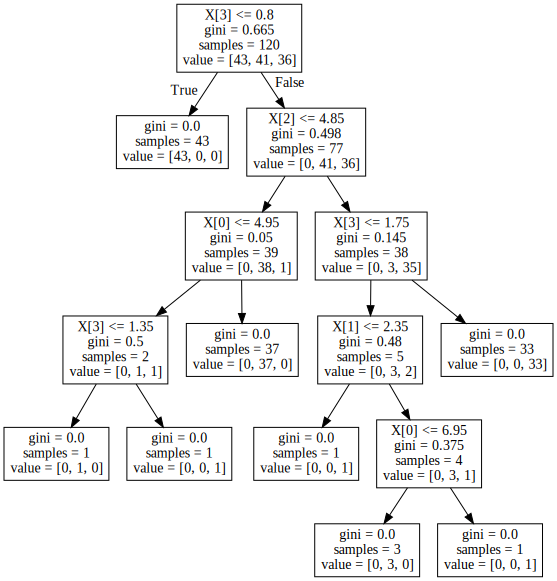

In [39]:
# 시각화 이미지 처리
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [40]:
# 옵션 추가 1 - 분류 기준으로 사용된 특성값을 컬럼명으로 바꾸기
# 파라미터에 feature_names = features 추가
features = iris.feature_names

In [41]:
# 옵션 추가 2 - 결과값을 데이터 속성(종이름)으로 바꾸기
# 파라미터에 class_names = species 추가
species = iris.target_names

In [42]:
features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [43]:
species

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

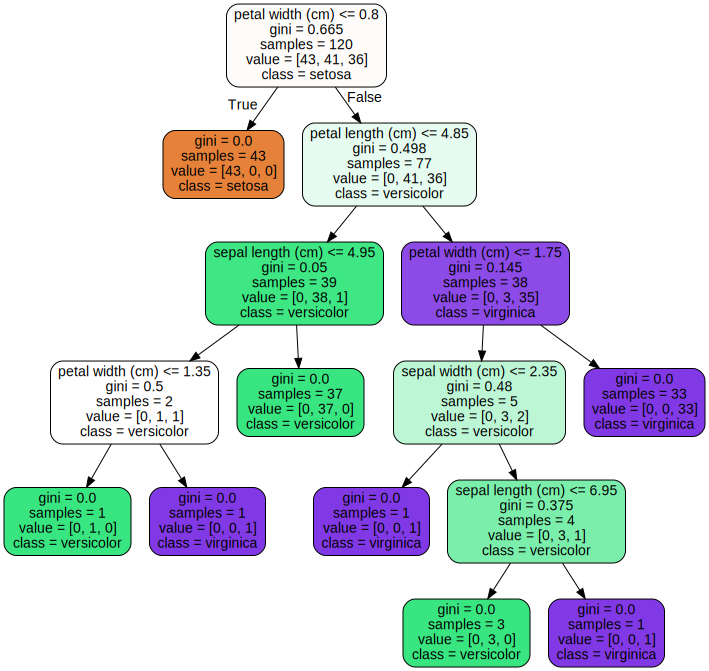

In [45]:
# 옵션 추가 3 - 박스 색상 채우기 & 박스 모서리 둥글게
# export_graphviz(filled, rounded)
dot_data = tree.export_graphviz(clf, feature_names=features, class_names=species, filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

In [46]:
# 결과물을 pdf 파일로 저장하기
graph.render('iris_img')

'iris_img.pdf'

## 변수 중요도 추출

In [48]:
# 사용된 변수(특성)에 대해 중요도 추출
# model.feature_importances_
print(iris.feature_names)
clf.feature_importances_

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([0.0306921 , 0.01128055, 0.38683052, 0.57119683])

In [49]:
# 모델이 사용한 독립변수 개수
n_features = clf.n_features_
n_features

4

In [50]:
# 인덱스
idx = range(clf.n_features_)
print(idx)

range(0, 4)


In [51]:
import matplotlib.pyplot as plt

([<matplotlib.axis.YTick at 0x21710e56a08>,
 <a list of 4 Text yticklabel objects>)

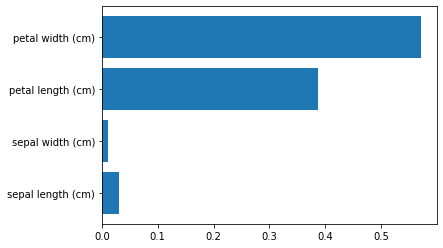

In [54]:
# feature_importance 시각화
# barh - plot

# x축에는 인덱스 번호가, y축에는 중요도가 들어가도록 barh를 이용해 시각화해주세요
plt.barh(idx, clf.feature_importances_)
plt.yticks(idx, iris.feature_names)

In [56]:
# (연습문제) 앞서 생성한 최대 깊이의 의사 결정 나무 모델과 결과 비교 v
# 최대 깊이를 3으로 재현한 모델의 정확도 산출해보기
# 1. 모델 객체 생성 => 최대 깊이를 3으로 설정(max_depth=3을 파라미터로 입력)
clf2 = DecisionTreeClassifier(max_depth=3)

In [57]:
# 학습 시키기
clf2.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [67]:
# 평가 하기
clf2.score(test_x, test_y)

0.8666666666666667

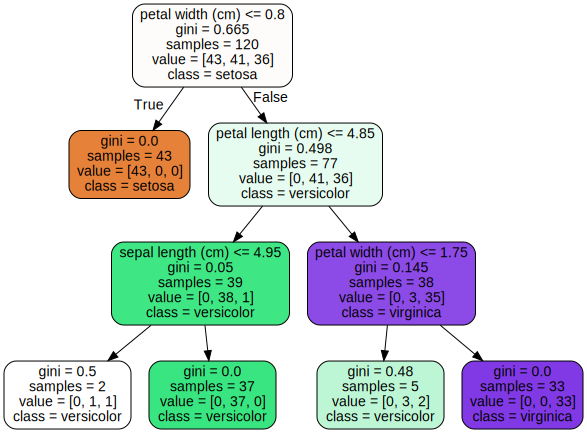

In [62]:
# 그래프 시각화
dot_data2 = tree.export_graphviz(clf2, feature_names=features, class_names=species, filled=True, rounded=True)
graph = graphviz.Source(dot_data2)
graph

In [69]:
# 중요도 산출
clf2.feature_importances_

array([0.01242048, 0.        , 0.40404925, 0.58353027])

In [68]:
clf2.score(train_x, train_y) # 과적합 문제에서 자유로움

0.975

2) 랜덤포레스트(Random Forest)

- Ensemble method(앙상블 기법)의 한 종류로 많은 의사결정나무로 이루어진 지도학습 모델
- 각각의 의사결정나무에서 사용되는 특징값들을 무작위로 선정
- 여러 의사결정나무의 평균 예측값을 사용하여 분류함으로써 단일 의사결정나무의 취약점인 과적합을 보완
- 데이터 특징값에 대한 해석 및 통찰을 얻기 어려움

In [70]:
# 랜덤포레스트 라이브러리 임포트
from sklearn.ensemble import RandomForestClassifier

In [71]:
# 랜덤포레스트 변수 생성
rfc = RandomForestClassifier()

In [73]:
# 모델 학습
rfc.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
# 학습 데이터 예측시키기
pred_data = rfc.predict(train_x)
pred_data

array([1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 2, 0, 0, 2, 2, 2, 0,
       1, 0, 2, 0, 0, 1, 0, 2, 2, 2, 0, 2, 2, 1, 2, 1, 2, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 1, 2, 1, 0, 2, 1, 2, 1, 0,
       0, 2, 2, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 2, 1, 1,
       1, 0, 2, 2, 1, 2, 0, 0, 0, 0])

In [75]:
# 학습 데이터 활용 정확도 계산
rfc.score(train_x, train_y)

1.0

In [76]:
# 시험 데이터 활용 정확도 계산
rfc.score(test_x, test_y)

0.9

In [77]:
# forest로 구성돤 개별 Decision Tree
rfc.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=2119277323, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=556479150, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                  

In [78]:
# 랜덤포레스트 모델의 feature_importances_ 를 출력해보세요
rfc.feature_importances_

array([0.07142108, 0.05297182, 0.47013734, 0.40546976])

### k-NN 알고리즘(k-Nearest Neighbors)

- 예측하려는 데이터에 대해 거리(유사성)가 가장 가까운 데이터(이웃)를 찾아 예측에 사용하는 알고리즘
- 둘 이상의 데이터(이웃)를 선택할 때 데이터가 많은 클래스를 기준으로 최종 이웃으로 선택 
- 이해하기 매우 쉽고 매개변수에 대한 복잡한 조정 없이 쉽게 좋은 성능을 발휘
- 학습 데이터의 크기가 너무 크면(변수의 개수, 데이터의 개수 등) 처리 속도가 느려짐
- 데이터를 구성하는 값이 대부분 0인 경우 잘 동작하지 않음
- 데이터 간 거리를 측정할 때 값의 범위(단위)가 다를 경우 범위가 작은 데이터에 영향을 크게 받기 때문에 단위를 통일시키는 정규화 과정이 필요
- 주요 매개변수
    - metirc & p : 데이터 간 거리를 측정하는 방식, 기본값 = minkowski & 2 = euclidian (여러 환경에서 잘 동작하여 일반적으로 사용됨)
    - n_neighbors : 이웃의 개수
- 결정경계(decision boundary) 
    - 클래스들 간의 영역을 구분하는 경계
    - 이웃(n_neighbors)의 수가 증가할 수록 부드러운 결정 경계 생성 => 단순한 모델을 의미
    - 이웃의 수가 작으면 모델의 복잡도가 증가
    - 일반적으로 모델의 복잡도가 높아질 수록 학습 데이터에 대한 정확도는 높아지지만 새로운 데이터에 일반화하는 성능은 낮아지는 경향
    - 이웃의 수를 증가시키면 학습 데이터에 대학 정확도는 낮아지더라도 테스트 데이터에 대한 정확도가 향상되며 안정적인 예측값을 얻을 수 있음
    - 이웃의 수가 많다고 해서 무조건 테스트 데이터에 대한 정확도가 높은 것은 아님

In [79]:
import mglearn

E:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


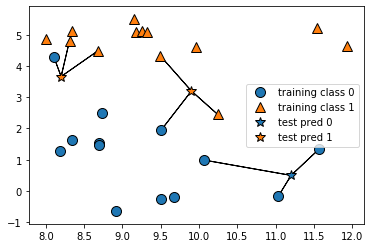

In [84]:
# KNN 예제 이미지
# n_neightbors=1 : 가장 가까운 1개의 데이터를 이웃으로 선택, 군집화
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [85]:
# KNN 라이브러리 불러오기
from sklearn.neighbors import KNeighborsClassifier

In [86]:
# KNN 변수 생성(n_neighbors는 자유롭게 넣어주세요)
knn = KNeighborsClassifier(n_neighbors=3)

In [87]:
# 모델 학습
knn.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [93]:
# 학습 데이터에 대한 결과 예측
knn_predict = knn.predict(train_x)
knn_predict

array([1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 2, 0, 0, 2, 2, 1, 0,
       1, 0, 2, 0, 0, 1, 0, 2, 2, 2, 0, 2, 2, 1, 2, 1, 2, 1, 1, 1, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 1, 2, 1, 0, 2, 1, 2, 1, 0,
       0, 2, 2, 1, 0, 1, 1, 2, 1, 0, 0, 1, 0, 2, 2, 0, 2, 0, 0, 2, 1, 1,
       1, 0, 2, 2, 1, 2, 0, 0, 0, 0])

In [89]:
# 학습 데이터에 대한 성능 평가
knn.score(train_x, train_y)

0.9583333333333334

In [94]:
# 시험 데이터에 대한 결과 예측
knn_predict2 = knn.predict(test_x)
knn_predict2

array([2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 0, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 0, 0, 0, 0, 0, 2])

In [95]:
# 시험 데이터에 대한 성능 평가
knn.score(test_x, test_y)

0.9666666666666667

In [104]:
# 임의로 이중 리스트 형태로 붓꽃 1개의 데이터를 입력해서 결과물 예측
knn.predict([[2.4, 3.5, 6.2, 1.1]])

array([2])